In [128]:
import warnings

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from helpers import model_report_from

In [129]:
# sometimes optimization fails to converge during grid search and i dont care
warnings.filterwarnings('ignore')

In [130]:
# load training/testing data
ft_train = np.load("./processed_data/features_train.npy")
ft_test = np.load("./processed_data/features_test.npy")
lbl_train = np.load("./processed_data/labels_train.npy")
lbl_test = np.load("./processed_data/labels_test.npy")

# Bagging

## Hyperparameter tuning

In [131]:
param = {
    'base_estimator' : [DecisionTreeClassifier(class_weight='balanced'), LogisticRegression(class_weight='balanced')],
    'n_estimators' : [10, 20, 50], 
    'max_features' : [1, 2, 3, 5, 10, 15], 
    'bootstrap_features' : [True, False]
}

In [132]:
clf = GridSearchCV(BaggingClassifier(), param, scoring='recall', refit=True, cv=5)

In [133]:
clf.fit(ft_train, lbl_train)
clf.best_params_

{'base_estimator': LogisticRegression(class_weight='balanced'),
 'bootstrap_features': True,
 'max_features': 3,
 'n_estimators': 50}

## Final Bagging Classifier

In [134]:
bag = BaggingClassifier(clf.best_params_['base_estimator'], n_estimators=clf.best_params_['n_estimators'], max_features=clf.best_params_['max_features'])

In [135]:
bag.fit(ft_train, lbl_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                  max_features=3, n_estimators=50)

accuracy = 0.6917808219178082
precision = 0.1225071225071225
recall = 0.86
f1 = 0.21446384039900251
ROC AUC score = 0.7715637860082304


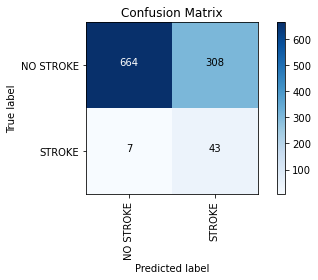

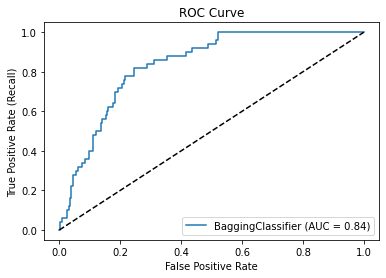

In [136]:
model_report_from(bag, ft_test, lbl_test, [])

# Random Forest

## Hyperparameter tuning

In [137]:
param = {
    'n_estimators' : [50, 100, 150, 200, 300, 500],
    'max_leaf_nodes' : [16, 24, 30],
    'criterion' : ['gini', 'entropy']
}

In [138]:
clf = GridSearchCV(RandomForestClassifier(class_weight="balanced", n_jobs=-1, criterion='entropy'), param, scoring='recall', refit=True, cv=5)

In [139]:
clf.fit(ft_train, lbl_train)
clf.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 16, 'n_estimators': 100}

## Final Random Forest Classifier

In [140]:
# training with parameters determined above
rfc = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_leaf_nodes=clf.best_params_['max_leaf_nodes'], n_jobs=-1, class_weight='balanced', criterion=clf.best_params_['criterion'])

In [141]:
rfc.fit(ft_train, lbl_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_leaf_nodes=16, n_jobs=-1)

accuracy = 0.716242661448141
precision = 0.13190184049079753
recall = 0.86
f1 = 0.22872340425531912
ROC AUC score = 0.7844238683127571


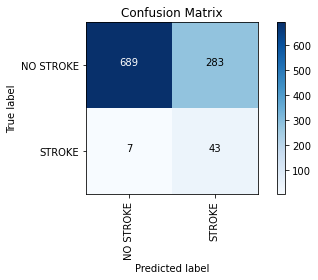

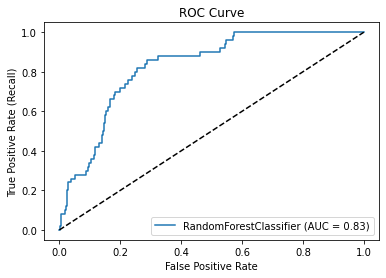

In [142]:
model_report_from(rfc, ft_test, lbl_test, [])